# Bike Share Demand with Linear Regression

## Exploratory Analysis

In [2]:
# Load necessary packages
library(ggplot2)
library(ggthemes)
library(caTools)
library(dplyr)
# Load the data
df <- read.csv('bikeshare.csv')
head(df)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
1,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
3,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
4,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
5,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
6,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


### Scatter Plot 1: count vs. temp

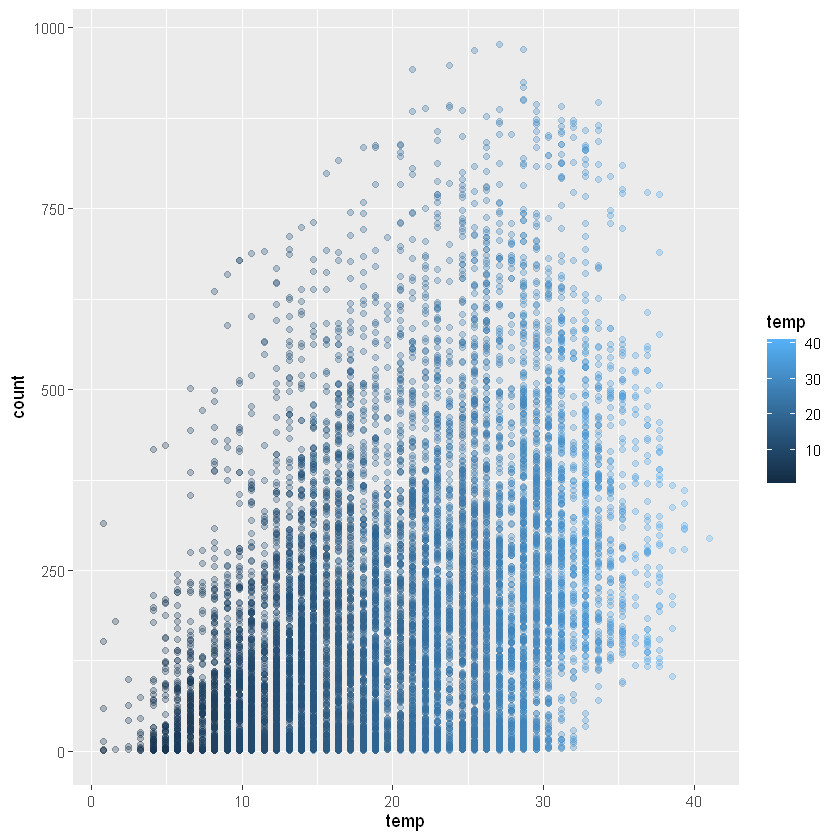

In [3]:
# Target Identification
target <- df$count

# Scatter Plot Count vs.temp
pl <- ggplot(df, aes(x=temp, y=count)) + geom_point(aes(fill=temp,color=temp), alpha=0.3)
print(pl)



The scatter plot shows that temperature affects the count of bike rentals:
* higher the temperature is, the higher counts are noted

### Scatter Plot 2: count vs. datetime

[1] "2011-01-01 00:00:00 CST" "2011-01-01 01:00:00 CST"
[3] "2011-01-01 02:00:00 CST" "2011-01-01 03:00:00 CST"
[5] "2011-01-01 04:00:00 CST" "2011-01-01 05:00:00 CST"

           temp     count
temp  1.0000000 0.3944536
count 0.3944536 1.0000000


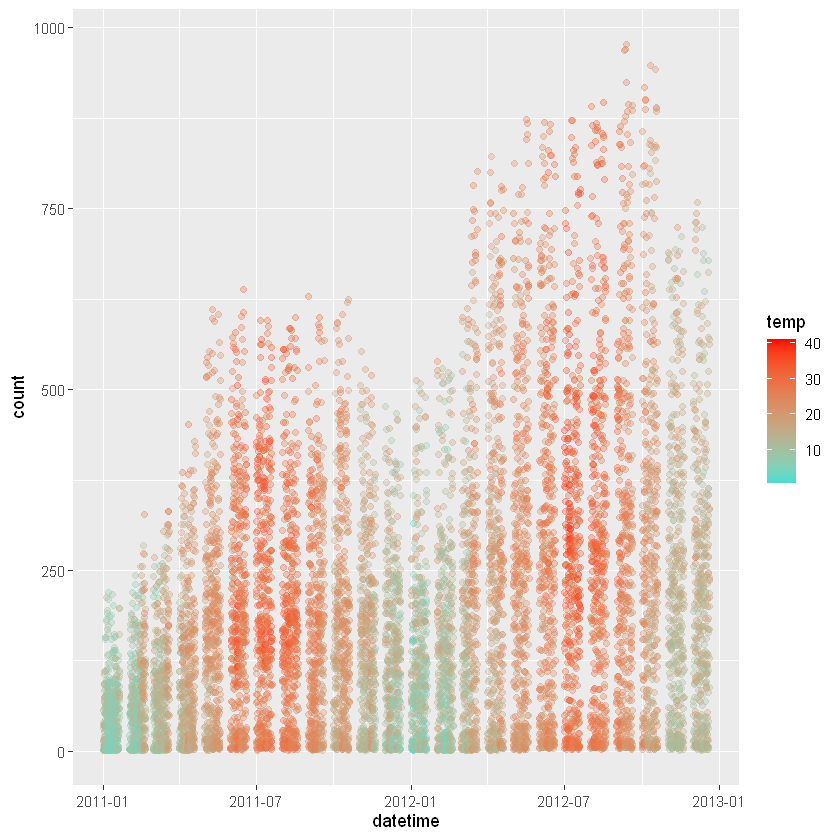

In [7]:
# Convert character to POSIXct
df$datetime <- as.POSIXct(df$datetime)
head(df$datetime)
# temp as a color
pl2 <- ggplot(df,aes(x=datetime, y=count)) + geom_point(aes(color=temp), alpha=0.3) +scale_color_gradient(high = 'red', low='turquoise')
print(pl2)

# Correlation between temp and count
cor.data = cor(df[,c("temp", "count")])
print(cor.data)
#           temp     count
#temp  1.0000000 0.3944536
#count 0.3944536 1.0000000

Datetime plot shows:
1. There is cyclic count variability
2. The bike rental count is generally increasing over time

### Box plot: count and season

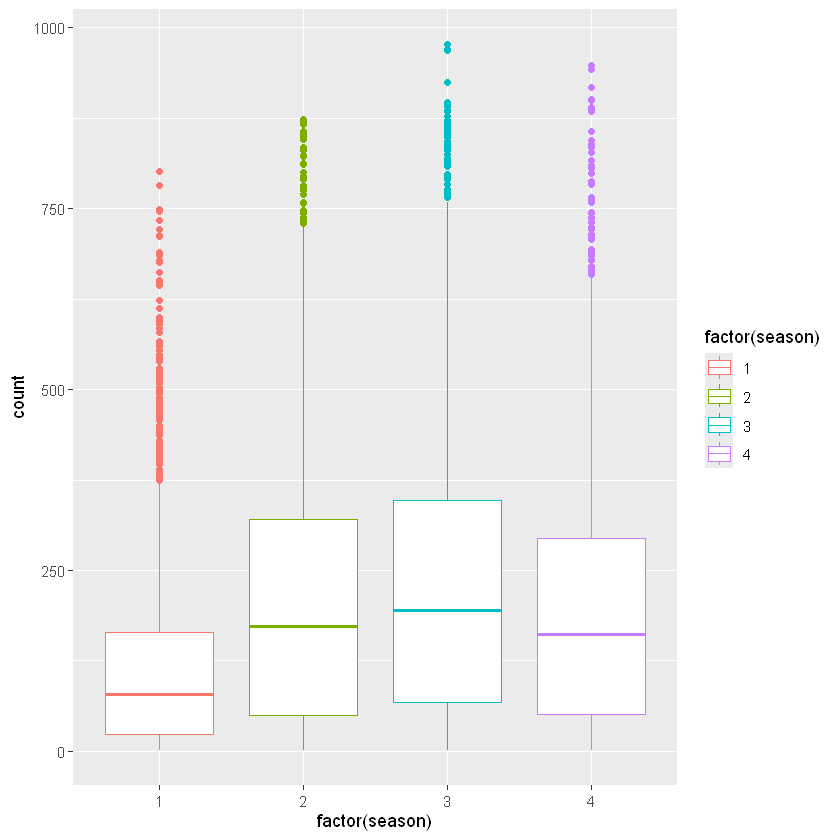

In [5]:

# Season data with BoxPlot. Y: count, X: Season
pl3 <- ggplot(df, aes(x=factor(season), y=count)) + geom_boxplot(aes(color=factor(season)))

# Growth of count show that the growth is not just due to the season

print(pl3)

Box plot shows:
1. season affects the growth of the bike rental count
2. the count increases not just due to the season

## Feature Engineering

             datetime season holiday workingday weather temp  atemp humidity
1 2011-01-01 00:00:00      1       0          0       1 9.84 14.395       81
2 2011-01-01 01:00:00      1       0          0       1 9.02 13.635       80
3 2011-01-01 02:00:00      1       0          0       1 9.02 13.635       80
4 2011-01-01 03:00:00      1       0          0       1 9.84 14.395       75
5 2011-01-01 04:00:00      1       0          0       1 9.84 14.395       75
6 2011-01-01 05:00:00      1       0          0       2 9.84 12.880       75
  windspeed casual registered count hour
1    0.0000      3         13    16   00
2    0.0000      8         32    40   01
3    0.0000      5         27    32   02
4    0.0000      3         10    13   03
5    0.0000      0          1     1   04
6    6.0032      0          1     1   05


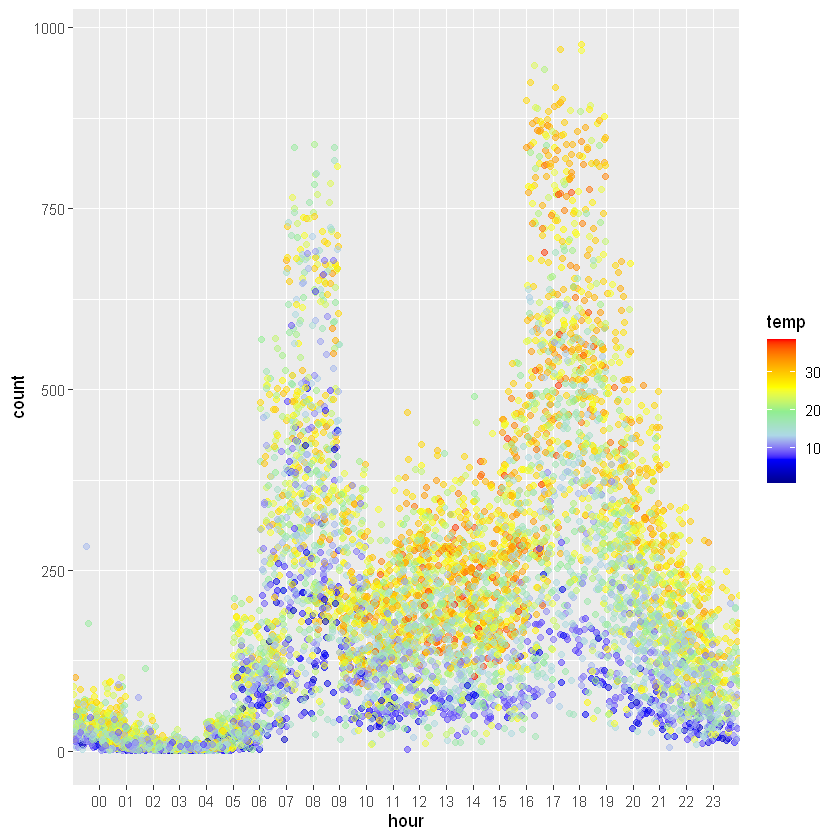

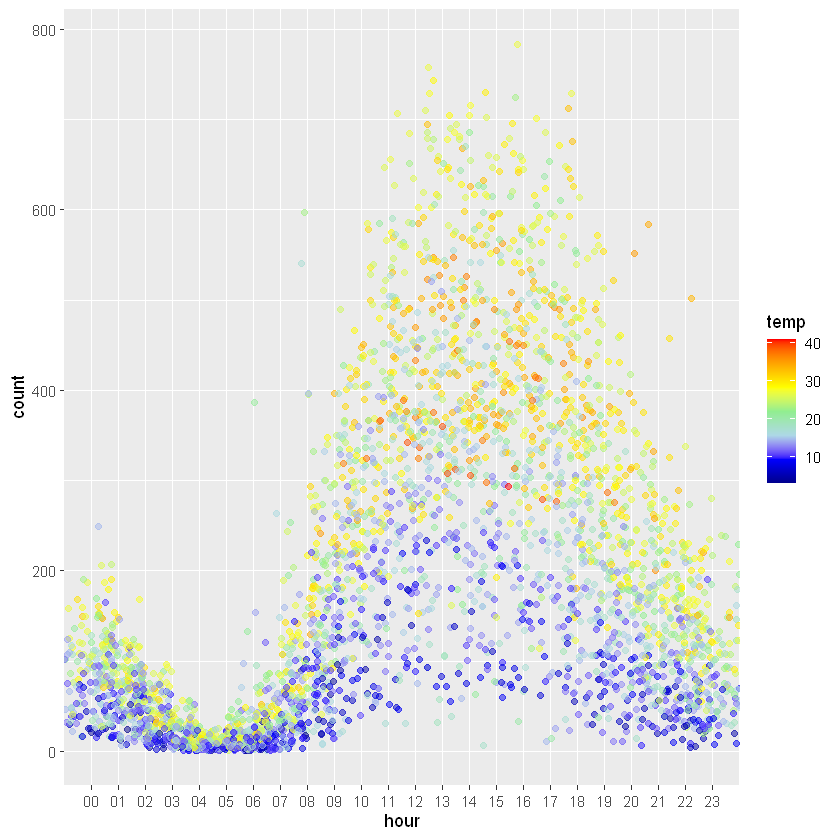

In [8]:
# Create an 'hour' column from datetime
df$hour <- sapply(df$datetime, function(x){format(x, "%H")})
print(head(df))

# Create a scatter plot count vs. hour with color based on temp
# Plotting for working days
pl4 <- ggplot(filter(df, workingday ==1), aes(x=hour, y=count)) + geom_point(position=position_jitter(w=1, h=0),aes(color=temp), alpha=0.5) +
  scale_color_gradientn(colours=c('dark blue','blue','light blue','light green','yellow','orange','red'))

print(pl4)
# Plotting for non-working days
pl5 <- ggplot(filter(df, workingday ==0), aes(x=hour, y=count)) + geom_point(position=position_jitter(w=1, h=0),aes(color=temp), alpha=0.5) +
  scale_color_gradientn(colours=c('dark blue','blue','light blue','light green','yellow','orange','red'))

print(pl5)


The Comparison Between working-day and non-working day shows:
1. count by hour is affected by day of the week
2. count increases during commute hours in working days

## Modeling

### Simple model with temp and count

In [9]:
# Modeling and summary analysis
model <- lm(target ~ temp, data = df )
summary(model)



Call:
lm(formula = target ~ temp, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-293.32 -112.36  -33.36   78.98  741.44 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.0462     4.4394   1.362    0.173    
temp          9.1705     0.2048  44.783   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 166.5 on 10884 degrees of freedom
Multiple R-squared:  0.1556,	Adjusted R-squared:  0.1555 
F-statistic:  2006 on 1 and 10884 DF,  p-value: < 2.2e-16


Analysis of coefficient:
* **Intercept** (6.0462): The expected value of the dependent variable when temp = 0. Since temperature is unlikely to be zero, this may not be meaningful.
* **temp** (9.1705): For every 1-unit increase in temperature, the dependent variable increases by 9.17 on average.
* **Std. Error**(0.2048): Measures the uncertainty in the coefficient estimate.
* **p-value** (<2e-16): Very low. temp is highly significant in predicting the outcome.


Q. If Temperature is 25 degrees, what is the predict value?

In [10]:
# temp: 9.1705 -> 6.0462(intercept) + 25* 9.1705 = 235.3087
temp25<- filter(df, temp >=25, temp < 26)
result <- predict(model, temp25)
print(mean(result))

[1] 239.1614


### Model with multiple variables

In [11]:
df$hour <- as.numeric(df$hour)
df_selected <- df %>% select(count, season, holiday, workingday, weather, temp, humidity, windspeed, hour)
model <- lm(count ~ ., data=df_selected)

summary(model)


Call:
lm(formula = count ~ ., data = df_selected)

Residuals:
    Min      1Q  Median      3Q     Max 
-324.61  -96.88  -31.01   55.27  688.83 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  46.91369    8.45147   5.551 2.91e-08 ***
season       21.70333    1.35409  16.028  < 2e-16 ***
holiday     -10.29914    8.79069  -1.172    0.241    
workingday   -0.71781    3.14463  -0.228    0.819    
weather      -3.20909    2.49731  -1.285    0.199    
temp          7.01953    0.19135  36.684  < 2e-16 ***
humidity     -2.21174    0.09083 -24.349  < 2e-16 ***
windspeed     0.20271    0.18639   1.088    0.277    
hour          7.61283    0.21688  35.102  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 147.8 on 10877 degrees of freedom
Multiple R-squared:  0.3344,	Adjusted R-squared:  0.3339 
F-statistic:   683 on 8 and 10877 DF,  p-value: < 2.2e-16


* The dataset likely shows recurring seasonal patterns (e.g., bike demand is higher in summer, lower in winter).
* Since OLS treats all variables linearly, it might incorrectly assume that demand increases or decreases due to the season itself, rather than recognizing that demand is generally increasing over time.